# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Energy ETF's

In [1]:
# This line configures the computational environment for this notebook.
%pylab inline
%run -i CBEformats

Populating the interactive namespace from numpy and matplotlib


ERROR: File `u'CBEformats.py'` not found.


## Introduction

In [2]:
import datetime as dt
import numpy as np
from scipy import stats
import pandas as pa
from pandas.io.data import DataReader

In [3]:
#symbols = ['USO']
symbols = ['GLD','SLV','DBS','F']
start_date = dt.datetime.now() + dt.timedelta(-10*365.25)

## Gathering Historical Price Information

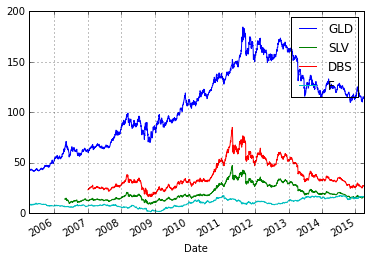

In [4]:
adj_close = dict()
for s in symbols:
    adj_close[s] = DataReader(s, "yahoo", start_date)["Adj Close"]
    adj_close[s].plot()
    
    
legend(symbols);

## Log Returns




 GLD: annual mean=  0.0977  annual std=  0.2051
    df= 3.62  loc=  0.1922       scale=  0.1423


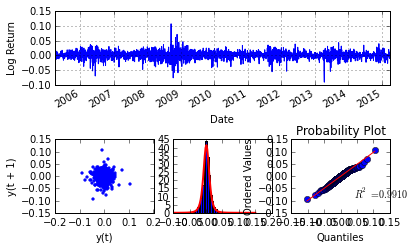




 SLV: annual mean=  0.0160  annual std=  0.3611
    df= 3.23  loc=  0.3235       scale=  0.2368


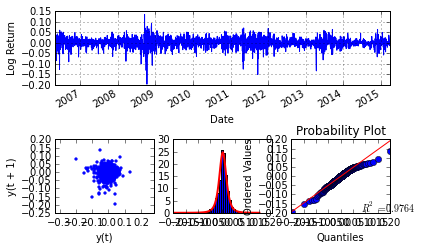




 DBS: annual mean=  0.0176  annual std=  0.3682
    df= 3.20  loc=  0.3036       scale=  0.2382


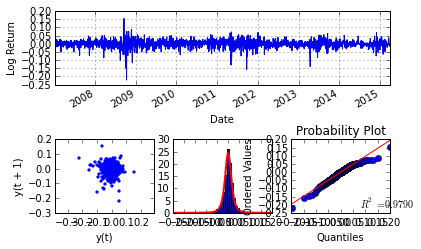




   F: annual mean=  0.0507  annual std=  0.4725
    df= 2.63  loc=  0.0318       scale=  0.2583


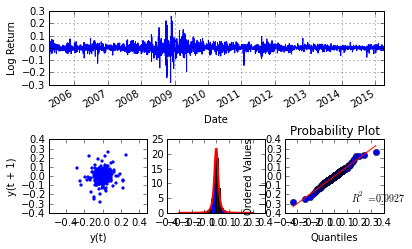

In [5]:
returns = dict()

for s in symbols:
    returns[s] = log(adj_close[s]/adj_close[s].shift(1))
    
for k in range(len(symbols)):
    
    # Descriptive statistics
    r = returns[symbols[k]][~np.isnan(returns[symbols[k]])]
    df,loc,scale = stats.t.fit(r)
    print "\n\n"
    print "{:>4s}: annual mean= {:7.4f}  annual std= {:7.4f}".format(symbols[k], 252*r.mean(), sqrt(252)*r.std())
    print "    df= {:4.2f}  loc= {:7.4f}       scale= {:7.4f}".format(df, 252*loc, sqrt(252)*scale)
    
    # Returns
    ax1 = subplot2grid((2,3),(0,0), colspan=3)
    r.plot()
    ylabel('Log Return')
    subplots_adjust(hspace=0.75)
    
    # Lag Plot
    ax2 = subplot2grid((2,3),(1,0))
    pa.tools.plotting.lag_plot(returns[symbols[k]],marker='.',color='blue')
    axis('equal');
    
    # Histogram with fitted t distribution
    ax3 = subplot2grid((2,3),(1,1))
    ax3.hist(r,bins=40,normed=1)
    x = linspace(ax3.axis()[0],ax3.axis()[1],100);
    plot(x,stats.t.pdf(x,df,loc,scale),'r',lw=2)
    
    # Probability (qq) plot compared to t distribution
    ax4 = subplot2grid((2,3),(1,2))
    stats.probplot(r, sparams = (df,loc,scale), dist='t', plot=plt)
    show()

## Copulas

GLD
2518
df  3.6204  loc  0.000763  scale  0.008964
SLV
2246
df  3.2346  loc  0.001284  scale  0.014915
DBS
2073
df  3.2039  loc  0.001205  scale  0.015006
F
2518
df  2.6305  loc  0.000126  scale  0.016270


ValueError: x and y must have same first dimension

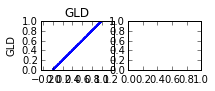

In [6]:
q = dict()
for k in range(len(symbols)):
    print symbols[k]
    r = returns[symbols[k]][~np.isnan(returns[symbols[k]])]
    df,loc,scale = stats.t.fit(r)
    print len(returns[symbols[k]])
    print "df {:7.4f}  loc {:9.6f}  scale {:9.6f}".format(df,loc,scale)
    q[symbols[k]] = stats.t.cdf(r,3.66,0.000857,0.00918)


for j in range(len(symbols)):
    for k in range(len(symbols)):
        subplot2grid((len(symbols),len(symbols)),(j,k))
        plot(q[symbols[j]],q[symbols[k]],'.',ms=1)
        axis('equal')
        title(symbols[k])
        ylabel(symbols[j])
        